# KNearestNeighbour Classifier with python

## Import libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data set

In [10]:
df = pd.read_csv('dataset.csv',index_col=0)

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scalar = StandardScaler()

In [44]:
scaled_df = scalar.fit_transform(df.drop('TARGET CLASS',axis=1))

In [45]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [46]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns[:-1])

## Pairplot

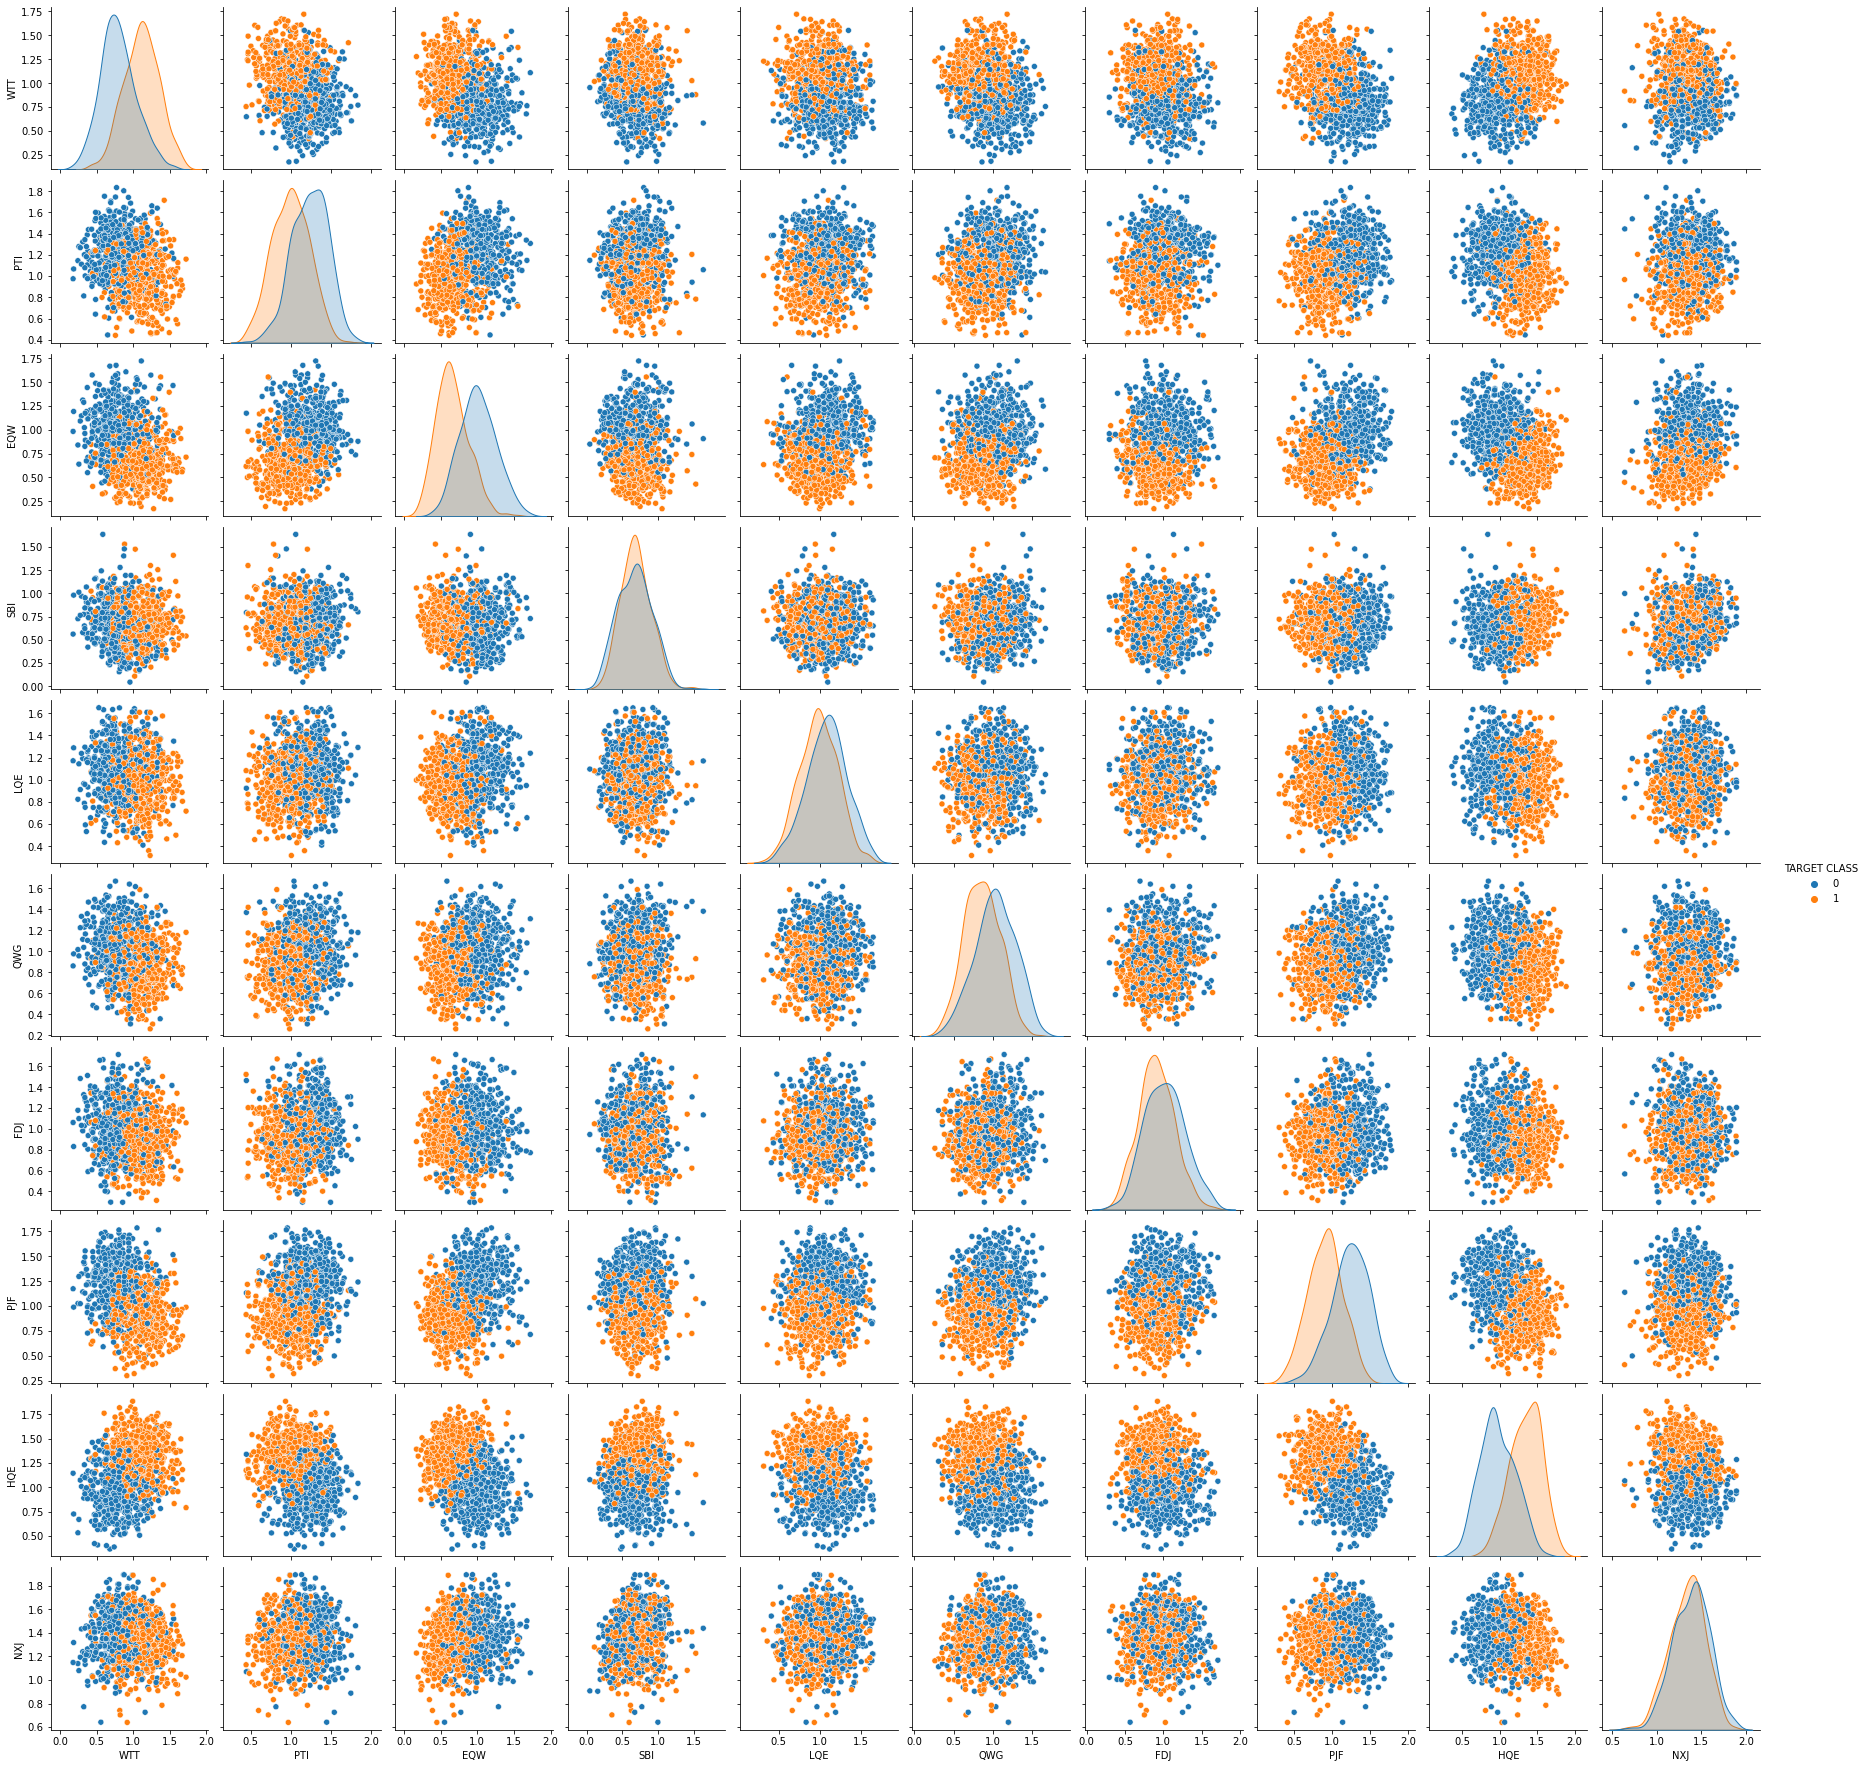

In [48]:
sns.pairplot(df,hue='TARGET CLASS')

## Train test split

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_df,df['TARGET CLASS'],test_size=.3)

## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [51]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred = model.predict(X_test)

## Evaluation K=1

In [63]:
# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(y_test,y_pred)

In [64]:
model.score(X_test,y_test)

0.9166666666666666

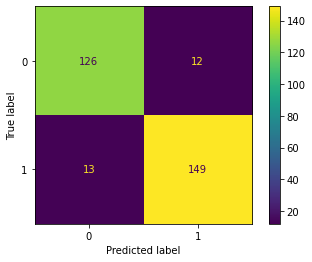

In [60]:
ConfusionMatrixDisplay(cm).plot()

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       138
           1       0.93      0.92      0.92       162

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choose best K value

elbow method

In [65]:
from sklearn.model_selection import cross_val_score

In [68]:
cross_val_score(model,scaled_df,df['TARGET CLASS'],cv=10)

array([0.86, 0.95, 0.9 , 0.88, 0.9 , 0.88, 0.95, 0.94, 0.89, 0.96])

In [73]:
scorelist = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,scaled_df,df['TARGET CLASS'],cv=10).mean()
    scorelist.append(score)

### Plot a graph: Accuracy vs K

Text(0, 0.5, 'Accurcy')

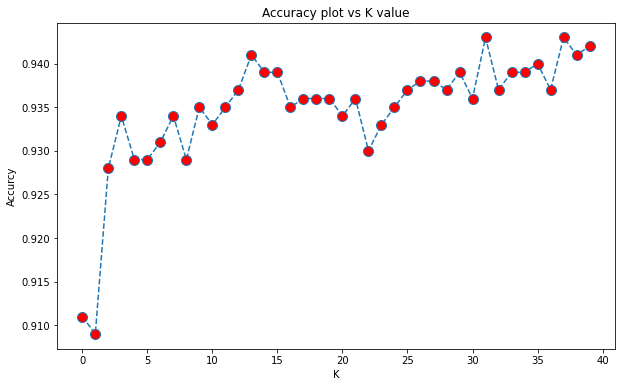

In [90]:
plt.figure(figsize=[10,6])
plt.plot(scorelist,marker='o',markersize=10,linestyle='dashed',markerfacecolor='red')
plt.title('Accuracy plot vs K value')
plt.xlabel('K')
plt.ylabel('Accurcy')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!



## K=23

In [91]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [92]:
knn.score(X_test,y_test)

0.9466666666666667

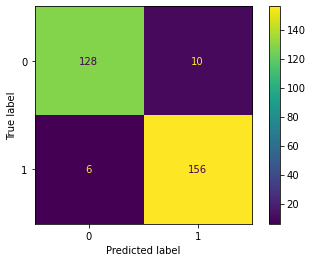

In [100]:
y_pred1 = knn.predict(X_test)
cm23 = confusion_matrix(y_test,y_pred1)
ConfusionMatrixDisplay(cm23).plot()

In [101]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       138
           1       0.94      0.96      0.95       162

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

